# Digital Studio workhsop: Web scraping data neighbourhood house addresses

## What are we doing

There is a wealth of data available on the Internet that is not immediately downloadable through conventional methods. Web scraping provides us with a way to programmatically extract important research data, where appropriate, from almost any website.
In this example, we will be looking at how to extract search results from an organisation for Neighbourhood Houses across Victoria.
https://www.nhvic.org.au/find-a-neighbourhood-house

## What python packages do we need and why?

For this exercise we will be using three python packages:
1. *requests* will allow us to fetch HTML from the nhvic.org.au website.
2. *BeautifulSoup* will allow us to extract relevant metadata from this HTML.
3. *pandas* will let us create a table of our results and export these to a CSV.

Note how the individual python packages all have a specific responsibility within our script. Once you learn the basics of a programming language, the next step is to become familiar with existing packages that will help you get get your work done faster.

We are also going to be doing some text wrangling to make the data easier to use, we willl be using:
1. *re* will allow us to read (or parse) the text and get rid of characters that are not needed to understand the data.

In [1]:
# Import the libraries needed to read data from the web
from bs4 import BeautifulSoup
import requests
# import library for data handling
import pandas as pd
# import library to pause so we don't overload their webpage
import time


## Where is the data?

We will be getting data from this set of search results:
    https://www.nhvic.org.au/find-a-neighbourhood-house
        
It is worth spending a moment to look at the different components of the URL.
1. 'https://www.nhvic.org.au' is the origin or root url
2. 'https://www.nhvic.org.au/find-a-neighbourhood-house' is the location of the search page we are going to webscrape

## What does it look like?

Next we will look at the html of this search page. In Google Chrome you can use the menu  *View* / *Developer* / *View Source* to see the html, that is, the website text that is 'marked up' to make it easier to read and appealing to look at.

## How do we get the raw HTML?


In [3]:
# grab the search page that contains urls for each neighbourhood house
pageUrl = "https://www.nhvic.org.au/list-of-neighbourhood-houses-via-local-government-area"
# remember to set the root url for later
rooturl = "https://www.nhvic.org.au"

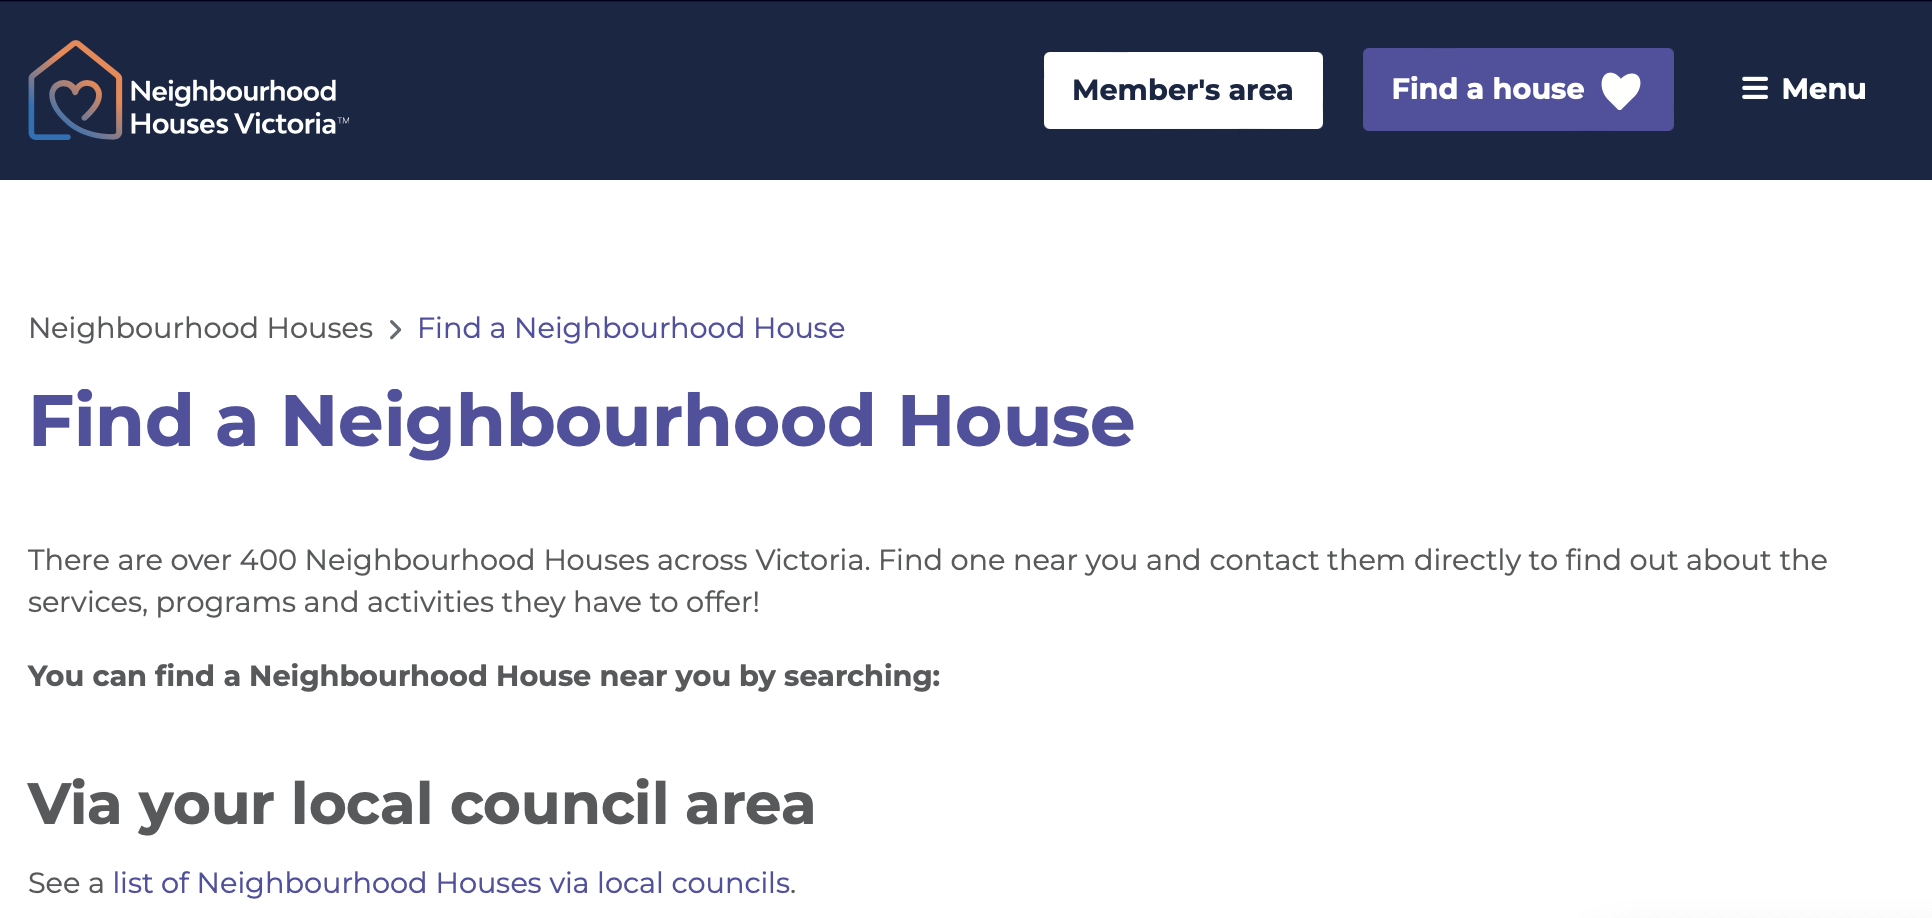

# Retrieve

In [4]:
# grab this page
response = requests.get(pageUrl)
soup = BeautifulSoup(response.text, "html.parser")


# Parse

### Loop through the subpages from this search page?

We can grab just the links from this page by finding all the html that has type 'a', that is, all the html links.

In [5]:
# get the table of  links on this page
tableoflinks = soup.find("table",{'summary': 'Table summary'})

# get the links inside the table
allLinks = tableoflinks.find_all('a',{'target': '_self'})

# get the neighhbourhood houses links only
links = [l.get("href") for l in allLinks]

# show the first couple of links
links[0:2]

['/mount-beauty-neighbourhood-centre', '/myrtleford-neighbourhood-centre']

In [6]:
len(links)

407

In [7]:
# add the root url into the links we've scraped
fullLinks = [rooturl+l for l in links]
# show just a few
fullLinks[10:15]

['https://www.nhvic.org.au/livingstone-community-centre',
 'https://www.nhvic.org.au/rosanna-fire-station-community-house',
 'https://www.nhvic.org.au/watsonia-neighbourhood-house',
 'https://www.nhvic.org.au/bass-valley-community-centre',
 'https://www.nhvic.org.au/corinella-and-district-community-centre']

In [10]:
# save this initial data we've webscraped
dfLinks = pd.DataFrame(fullLinks, columns=["links"])
dfLinks.to_csv("FullLinks.csv",index=False)

### Jumping off point
If you would like to continue and webscrape the addresses as well lets move onto retrieving the addresses for these neighbourhood houses.

# Extract

In [12]:
# make a little function to grab the name and address from a link
def getPageData(thisLink):
    # grab this page
    response = requests.get(thisLink)
    soup = BeautifulSoup(response.text,"html.parser")
    # get the meta content (name,address) on this page
    address = soup.find('meta',{'property':'og:description'})['content']
    name = soup.find('meta',{'property':'og:title'})['content']
    
    pagedata = {'name': name,
               'address': address,
               'url': thisLink}
    time.sleep(.5)
    
    return pagedata


In [13]:
# grab just one page to check this works
getPageData(fullLinks[10])

{'name': 'Livingstone Community Centre',
 'address': '1 Livingstone Street, IVANHOE',
 'url': 'https://www.nhvic.org.au/livingstone-community-centre'}

In [15]:
# now loop through all the links and get each page's data
pages=[]
for l in fullLinks:
    print(l)
    # grab this page
    pages.append(getPageData(l))


https://www.nhvic.org.au/foundation-learning-centre
https://www.nhvic.org.au/oakgrove-community-centre
https://www.nhvic.org.au/dunolly-and-district-neighbourhood-centre
https://www.nhvic.org.au/maryborough-community-house
https://www.nhvic.org.au/mill-house-neighbourhood-house
https://www.nhvic.org.au/marrar-woorn-neighbourhood-house
https://www.nhvic.org.au/colac-neighbourhood-house
https://www.nhvic.org.au/forrest-and-district-neighbourhood-house
https://www.nhvic.org.au/gellibrand-community-house
https://www.nhvic.org.au/camperdown-community-house
https://www.nhvic.org.au/simpson-and-district-community-centre
https://www.nhvic.org.au/alphington-community-centre
https://www.nhvic.org.au/jika-jika-community-centre
https://www.nhvic.org.au/bridge-darebin-preston
https://www.nhvic.org.au/northern-community-careworks
https://www.nhvic.org.au/preston-reservoir-adult-community-education
https://www.nhvic.org.au/reservoir-neighbourhood-house
https://www.nhvic.org.au/bridge-darebin-thornbur

[{'name': 'Foundation Learning Centre',
  'address': '1 Malcolm Court, NARRE WARREN',
  'url': 'https://www.nhvic.org.au/foundation-learning-centre'},
 {'name': 'Oakgrove Community Centre',
  'address': '89-101 Oakgrove Drive, NARRE WARREN SOUTH',
  'url': 'https://www.nhvic.org.au/oakgrove-community-centre'},
 {'name': 'Dunolly and District Neighbourhood Centre',
  'address': 'Havelock Street, DUNOLLY',
  'url': 'https://www.nhvic.org.au/dunolly-and-district-neighbourhood-centre'},
 {'name': 'Maryborough Community House',
  'address': '23 Primrose Street, MARYBOROUGH',
  'url': 'https://www.nhvic.org.au/maryborough-community-house'},
 {'name': 'Mill House Neighbourhood House',
  'address': '88-90 Burke Street, MARYBOROUGH',
  'url': 'https://www.nhvic.org.au/mill-house-neighbourhood-house'},
 {'name': 'Marrar Woorn Neighbourhood House',
  'address': '6 Pengilley Avenue, APOLLO BAY',
  'url': 'https://www.nhvic.org.au/marrar-woorn-neighbourhood-house'},
 {'name': 'Colac Neighbourhood H

In [16]:
pages

[{'name': 'Foundation Learning Centre',
  'address': '1 Malcolm Court, NARRE WARREN',
  'url': 'https://www.nhvic.org.au/foundation-learning-centre'},
 {'name': 'Oakgrove Community Centre',
  'address': '89-101 Oakgrove Drive, NARRE WARREN SOUTH',
  'url': 'https://www.nhvic.org.au/oakgrove-community-centre'},
 {'name': 'Dunolly and District Neighbourhood Centre',
  'address': 'Havelock Street, DUNOLLY',
  'url': 'https://www.nhvic.org.au/dunolly-and-district-neighbourhood-centre'},
 {'name': 'Maryborough Community House',
  'address': '23 Primrose Street, MARYBOROUGH',
  'url': 'https://www.nhvic.org.au/maryborough-community-house'},
 {'name': 'Mill House Neighbourhood House',
  'address': '88-90 Burke Street, MARYBOROUGH',
  'url': 'https://www.nhvic.org.au/mill-house-neighbourhood-house'},
 {'name': 'Marrar Woorn Neighbourhood House',
  'address': '6 Pengilley Avenue, APOLLO BAY',
  'url': 'https://www.nhvic.org.au/marrar-woorn-neighbourhood-house'},
 {'name': 'Colac Neighbourhood H

In [17]:
df = pd.DataFrame(pages)
df.sample(5)

name  \
4              Mill House Neighbourhood House   
6                   Colac Neighbourhood House   
12                 Jika Jika Community Centre   
2   Dunolly and District Neighbourhood Centre   
16              Reservoir Neighbourhood House   

                            address  \
4   88-90 Burke Street, MARYBOROUGH   
6           23 Miller Street, COLAC   
12       1B Plant Street, NORTHCOTE   
2          Havelock Street, DUNOLLY   
16      2B Cuthbert Road, RESERVOIR   

                                                  url  
4   https://www.nhvic.org.au/mill-house-neighbourh...  
6   https://www.nhvic.org.au/colac-neighbourhood-h...  
12  https://www.nhvic.org.au/jika-jika-community-c...  
2   https://www.nhvic.org.au/dunolly-and-district-...  
16  https://www.nhvic.org.au/reservoir-neighbourho...

## Save 
the neigbhourhoood houses and their address to a csv file

In [18]:
df.to_csv('MoM.T2.NeighbourhoodHouses.csv')